In [2]:
import os
from prose import FITSImage, FitsManager

callisto.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
io.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
ganymede.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
europa.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
artemis.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
trappist-south.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
trappist-north.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
saint-ex.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
liverpool.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
spirit.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)


/opt/anaconda3/envs/semester_project_2/lib/python3.11/site-packages/prose/console_utils.py:15: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
dir_real_bias = 'real_bias'
dir_real_flat = '10'

In [4]:
fm_real_bias = FitsManager(dir_real_bias, depth=1)
fm_real_flat = FitsManager(dir_real_flat, depth=1)

Parsing FITS: 100%|██████████| 100/100 [00:00<00:00, 1684.04it/s]


In [5]:
print(fm_real_bias)
print(fm_real_flat)

          date telescope filter  type          target  width  height  files
id                                                                         
1   2021-11-17    Spirit         bias  Autosave Image   1280    1024    100
          date telescope filter   type target  width  height  files
id                                                                 
1   2021-11-18    Spirit  clear  light          1280    1024    100


In [6]:
ref_real_bias = FITSImage(fm_real_bias.all_bias[0])

In [7]:
ref_real_flat = FITSImage(fm_real_flat.all_images[0])

In [8]:
flat_minus_bias = ref_real_flat
flat_minus_bias.data -= ref_real_bias.data

In [9]:
import matplotlib.pyplot as plt
bruh = flat_minus_bias.data


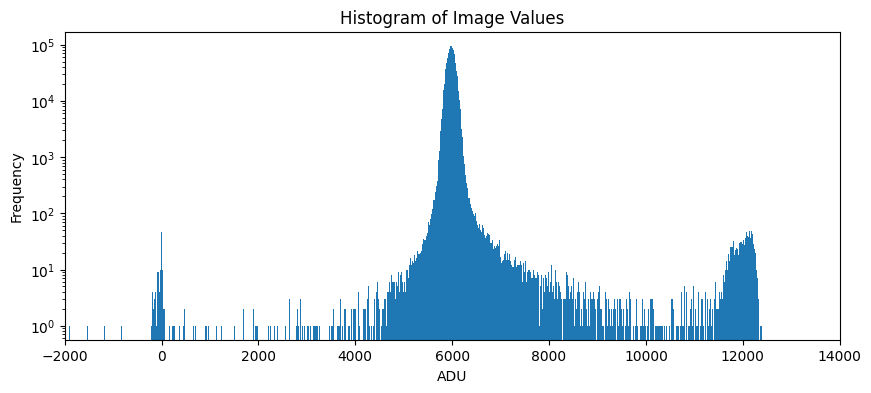

In [10]:
plt.figure(figsize=(10, 4))
plt.hist(bruh.flatten(), bins=1000)#, color='gray', edgecolor='black')
plt.title("Histogram of Image Values")
plt.xlabel("ADU")
plt.ylabel("Frequency")
plt.xlim(-2000, 14000)
plt.yscale('log')
plt.show()

In [12]:
import numpy as np
np.max(bruh), np.min(bruh)

(12400.0, -2426.0)

In [22]:
bruhpositive = bruh[bruh > 0]
frequencies, bin_edges = np.histogram(bruhpositive, bins=1000)

/var/folders/zq/6x2qbk397t13zwgl047mwbkm0000gn/T/ipykernel_86167/1255909421.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(bin_edges[1:], np.log(frequencies))


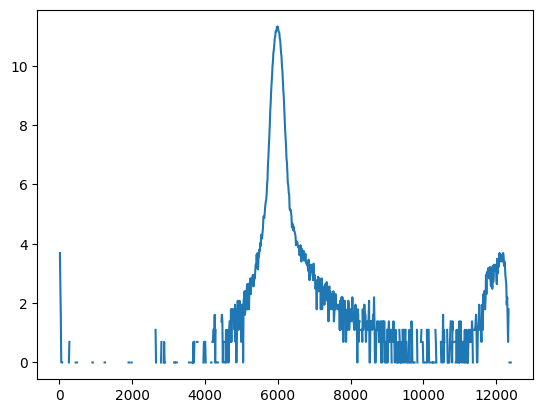

In [31]:
plt.plot(bin_edges[1:], np.log(frequencies))
#plt.yscale('log')

In [35]:
frequencies[frequencies > 0]

array([   40,    14,     5,     1,     1,     1,     1,     1,     1,
           1,     2,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     2,     1,     1,     1,     1,     1,     1,     2,
           1,     1,     1,     1,     1,     1,     3,     1,     1,
           2,     1,     1,     2,     1,     1,     2,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     2,
           1,     2,     1,     2,     2,     1,     2,     2,     1,
           2,     2,     2,     1,     4,     1,     2,     1,     1,
           2,     2,     3,     2,     5,     1,     3,     1,     1,
           1,     1,     1,     3,     4,     4,     5,     4,     1,
           2,     2,     1,     1,     1,     3,     1,     3,     2,
           3,     1,     1,     3,     4,     4,     2,     6,     2,
           6,     6,

In [38]:
from scipy.stats import norm
mu, std = norm.fit(np.log(frequencies[frequencies > 0]))
mu, std

(2.0892350234472543, 2.3985357118290302)

In [ ]:
x = np.linspace(2000, 10000, 100)
y = norm.pdf(x, mu, std)
plt.plot(bin_edges[1:], np.log(frequencies))
plt.plot(x, y, 'r-', label=f'Gaussian fit\n$\mu={mu:.2f}$, $\sigma={std:.2f}$')
plt.xlabel('Data')
plt.ylabel('Density')
plt.legend()
plt.show()